In [1]:
import warnings
warnings.filterwarnings("ignore")

# Цель занятия
На этом занятии мы рассмотрим особенности моделей градиентного бустинга.

## Базовое дерево

In [2]:
class BasicTree:
    
    def __init__(self, max_depth=None, criterion="entropy"):
        raise NotImplementedError("Метод требует переопределения в классе наследования")


    
    @staticmethod
    def find_best_split_entropy(X, y):
        """
        Находит лучшее разбиение для вектора признаков X и вектора целевой переменной y, используя критерий энтропии.
        Аргументы:
        - X: вектор numpy с вещественными значениями признаков.
        - y: вектор numpy с дискретными значениями целевой переменной.

        Возвращает:
        - best_feature: индекс признака, по которому было найдено лучшее разбиение.
        - best_threshold: значение порога, по которому было найдено лучшее разбиение.
        - best_gain: значение критерия энтропии для лучшего разбиения.
        """
        def entropy(y):
            """
            Вычисляет энтропию вектора y со значениями дискретных переменных.
            Аргументы:
            - y: вектор numpy с дискретными значениями.
            Возвращает:
            - entropy: значение энтропии типа float.
            """
            # Подсчитываем количество каждого уникального значения в y.
            _, counts = np.unique(y, return_counts=True)
            # Вычисляем вероятность каждого уникального значения.
            probs = counts / len(y)
            # Вычисляем значение энтропии.
            return -np.sum(probs * np.log2(probs))
        
        best_feature, best_threshold, best_gain = None, None, 0
        # Итерируемся по всем признакам.
        for feature in range(X.shape[1]):
            # Находим уникальные значения признака.
            thresholds = np.unique(X[:, feature])
            # Итерируемся по всем возможным пороговым значениям признака.
            for threshold in thresholds:
                # Определяем индексы объектов, которые относятся к левому поддереву и правому поддереву.
                left_indices = X[:, feature] <= threshold
                right_indices = X[:, feature] > threshold
                # Пропускаем текущую итерацию, если не найдены объекты, которые относятся к левому или правому поддереву.
                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue
                # Определяем вектор целевой переменной для объектов, которые относятся к левому и правому поддереву.
                left_y, right_y = y[left_indices], y[right_indices]
                # Вычисляем значение критерия энтропии для текущего разбиения.
                gain = entropy(y) - (len(left_y) / len(y)) * entropy(left_y) \
                                       - (len(right_y) / len(y)) * entropy(right_y)
                # Обновляем значения лучшего разбиения, если найдено разбиение с большим значением
                if gain > best_gain:
                    best_feature, best_threshold, best_gain = feature, threshold, gain
        return best_feature, best_threshold, best_gain
    
    @staticmethod
    def find_best_split_gini(X, y):
        
        """
        Находит лучшее разбиение для вектора признаков X и вектора целевой переменной y, используя критерий Джини.

        Аргументы:
        - X: вектор numpy с вещественными значениями признаков.
        - y: вектор numpy с дискретными значениями целевой переменной.

        Возвращает:
        - best_feature: индекс признака, по которому было найдено лучшее разбиение.
        - best_threshold: значение порога, по которому было найдено лучшее разбиение.
        - best_gain: значение критерия энтропии для лучшего разбиения.
        """
        # Завершите реализацию функции gini_index 

        def gini_index(y):

            """
            Вычисляет критерий Джини для вектора y со значениями дискретных переменных.

            Аргументы:
            - y: вектор numpy с дискретными значениями.

            Возвращает:
            - gini: значение критерия Джини типа float.

            Подсчитываем количество каждого уникального значения в y.
            """
            _, counts = np.unique(y, return_counts=True)
            # Вычисляем вероятность каждого уникального значения.
            probs = counts / len(y)

            if not len(probs):
                return 0

            criterion  = 1 - np.sum(probs ** 2)
            return criterion

        best_feature, best_threshold, best_gain = None, None, 0
        # Итерируемся по всем признакам.
        for feature in range(X.shape[1]):
            # Находим уникальные значения признака.
            thresholds = np.unique(X[:, feature])
            # Итерируемся по всем возможным пороговым значениям признака.
            for threshold in thresholds:
                # Определяем индексы объектов, которые относятся к левому поддереву и правому поддереву.
                left_indices = X[:, feature] <= threshold
                right_indices = X[:, feature] > threshold
                # Пропускаем текущую итерацию, если не найдены объекты, которые относятся к левому или правому поддереву.
                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue
                # Определяем вектор целевой переменной для объектов, которые относятся к левому и правому поддереву.
                left_y, right_y = y[left_indices], y[right_indices]

                gain = gini_index(y) - (len(left_y) / len(y)) * gini_index(left_y) - (len(right_y) / len(y)) * gini_index(right_y)
                # Обновляем значения лучшего разбиения, если найдено разбиение с большим значением
                if gain > best_gain:
                    best_feature, best_threshold, best_gain = feature, threshold, gain
        return best_feature, best_threshold, best_gain
    
        
    @staticmethod   
    def find_best_split_mse(X, y):
        """
        Находит лучшее разбиение для вектора признаков X и вектора целевой переменной y, 
        используя критерий среднеквадратичной ошибки (MSE).

        Аргументы:
        - X: вектор numpy с вещественными значениями признаков.
        - y: вектор numpy с вещественными значениями целевой переменной.

        Возвращает:
        - best_feature: индекс признака, по которому было найдено лучшее разбиение.
        - best_threshold: значение порога, по которому было найдено лучшее разбиение.
        - best_mse: значение критерия среднеквадратичной ошибки для лучшего разбиения.
        """
        best_feature, best_threshold, best_mse = None, None, float('inf')
        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] <= threshold
                right_indices = X[:, feature] > threshold
                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue
                left_y, right_y = y[left_indices], y[right_indices]
                mse = np.mean((left_y - np.mean(left_y))**2) + np.mean((right_y - np.mean(right_y))**2)
                if mse < best_mse:
                    best_feature, best_threshold, best_mse = feature, threshold, mse
        return best_feature, best_threshold, best_mse

    def fit(self, X, y, y_pred=None):
        """
        Обучает дерево регрессии на обучающих данных X и y.

        Аргументы:
        - X: вектор numpy с вещественными значениями признаков.
        - y: вектор numpy с вещественными значениями целевой переменной.
        - y_pred (опционально): вектор numpy с вещественными значениями предсказаний (для Gradient boosting)
        """
        if y_pred is not None:
            self.tree = self._build_tree(X, y, depth=0, y_pred=y_pred)
        else:
            self.tree = self._build_tree(X, y, depth=0)

    def predict(self, X):
        """
        Выполняет предсказание для входных данных X.

        Аргументы:
        - X: вектор numpy с вещественными значениями признаков.

        Возвращает:
        - predictions: вектор numpy с предсказанными вещественными значениями.
        """
        return np.array([self._traverse_tree(x, self.tree) for x in X])

    def _build_tree(self, X, y, depth, y_pred=None):
        """
        Рекурсивно строит дерево регрессии, используя входные данные X и y.

        Аргументы:
        - X: вектор numpy с вещественными значениями признаков.
        - y: вектор numpy с вещественными значениями целевой переменной.
        - y_pred (опционально): вектор numpy с вещественными значениями предсказаний (для Gradient boosting)
        - depth: текущая глубина дерева.

        Возвращает:
        - node: словарь, представляющий узел дерева.

        """
        # Проверка условий останова по максимальной глубине и другим критериям
        if self.max_depth is not None and depth >= self.max_depth:
            # Создание листового узла
            return self._create_leaf_node(y, y_pred)
        
        # Нахождение лучшего разбиения по критерию энтропии
        if self.criterion == "entropy":
            best_feature, best_threshold, _ = self.find_best_split_entropy(X, y)
            
        # Нахождение лучшего разбиения по критерию джини
        elif self.criterion == "gini":
            best_feature, best_threshold, _ = self.find_best_split_gini(X, y)

        # Нахождение лучшего разбиения по критерию mse
        elif self.criterion == "mse":
            best_feature, best_threshold, _ = self.find_best_split_mse(X, y)
            
        else:
            raise Exception('Следует задать критерий разбиения из списка ["mse", "entropy"]')

        # Проверка условия останова, если не удалось найти лучшее разбиение
        if best_feature is None or best_threshold is None:
            # Создание листового узла
            if y_pred is not None:
                return self._create_leaf_node(y, y_pred)
            return self._create_leaf_node(y)

        # Разделение данных на левое и правое поддеревья
        left_indices = X[:, best_feature] <= best_threshold
        right_indices = X[:, best_feature] > best_threshold

        # Рекурсивное построение левого и правого поддеревьев
        if y_pred is not None:
            left_tree = self._build_tree(X[left_indices], y[left_indices], depth + 1, y_pred[left_indices])
            right_tree = self._build_tree(X[right_indices], y[right_indices], depth + 1, y_pred[right_indices])
        else:
            left_tree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
            right_tree = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        # Создание узла с информацией о лучшем разбиении
        node = {'feature': best_feature, 'threshold': best_threshold,
                'left': left_tree, 'right': right_tree}

        return node


    def _create_leaf_node(self, y, y_pred=None):
        raise NotImplementedError("Метод требует переопределения в классе наследования")


    def _traverse_tree(self, x, node):
        """
        Обходит дерево регрессии для выполнения предсказания на входных данных x.

        Аргументы:
        - x: вектор numpy с вещественными значениями признаков.
        - node: текущий узел дерева.

        Возвращает:
        - value: предсказанное вещественное значение.
        """
        if 'value' in node:
            return node['value']

        if x[node['feature']] <= node['threshold']:
            return self._traverse_tree(x, node['left'])
        else:
            return self._traverse_tree(x, node['right'])


## Дерево для регрессии

In [3]:
class RegressionTree(BasicTree):
    def __init__(self, max_depth=None, criterion="mse"):
        """
        Инициализирует объект RegressionTree.

        Аргументы:
        - max_depth: максимальная глубина дерева (опционально). 
        Если значение None, то дерево будет строиться без ограничения глубины.
        - criterion: выбор способа разбиений деревьев. Выбирается из списка: 
        ["mse", "entropy", "gini"]
        """
        self.max_depth = max_depth
        self.criterion = criterion
        self.tree = None


    def _create_leaf_node(self, y, y_pred=None):
        """
        Создает листовой узел дерева регрессии.

        Аргументы:
        - y: вектор numpy с вещественными значениями целевой переменной.

        Возвращает:
        - node: словарь, представляющий листовой узел среднего значения целевой переменной.
        """
        return {'value': np.mean(y)}

Входные данные: Data $\{(x_i, y_i)\}_{i=1}^n$

Дифференцируемая функция потерь $L(y_i, F(x_i))$ (квадратичная функция потерь как наиболее часто используемая)

Шаг 1: Инициализировать модель константным значением: $F_0(x)=\underset{\gamma}{\operatorname{argmin}} \sum_{i=1}^n L(y_i, \gamma)$, где $\gamma$ - предсказанное значение. Обычно используется среднее значение.

Шаг 2: for $m=1$ to $M$ : (для каждого из M деревьев в ансамбле)

(A) Вычисление остатков (residuals) $r_{i m}=-\left[\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)}\right]_{F(x)=F_{m-1}(x)}$ for $i=1, \ldots, n$ (i - i-й обучающий пример)

(B) Обучить дерево на объектах $r_{\text {im }}$ и получить $J$ листьев $R_{j m}$, for $j=1 \ldots J_m$

(C) Для каждого листа $j=1 \ldots J_m$ вычислить предсказание $\gamma_{j m}=\underset{\gamma}{\operatorname{argmin}} \sum_{x_i \in R_{i j}} L\left(y_i, F_{m-1}\left(x_i\right)+\gamma\right)$

(D) Добавить текущее предсказание к уже полученному значению на предыдущих итерациях $F_m(x)=F_{m-1}(x)+\nu \sum_{j=1}^{J_m} \gamma_{j m} I\left(x \in R_{j m}\right)$ , где $\nu$ - скорость обучения.

Шаг 3: Получить итоговые предсказания $F_M(x)$

In [14]:
class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.estimators = []

    def fit(self, X, y):
        # Инициализируем предсказания базовой модели нулевым значением
        predictions = np.full_like(y, 0)
        # Инициализируем предсказания базовой модели средним значением
#         predictions = np.full_like(y, np.mean(y))

        for _ in range(self.n_estimators):
            # Вычисляем остатки между предсказаниями и истинными значениями
            residuals = y - predictions

            # Создаем экземпляр регрессионного дерева
            tree = RegressionTree(max_depth=self.max_depth)

            # Обучаем дерево на остатках
            tree.fit(X, residuals)

            # Получаем предсказания для текущего дерева
            tree_predictions = tree.predict(X)

            # Обновляем предсказания ансамбля
            predictions += self.learning_rate * tree_predictions

            # Сохраняем дерево в список базовых моделей
            self.estimators.append(tree)

    def predict(self, X):
        # Инициализируем предсказания нулевым значением
        predictions = np.zeros(len(X))
#         predictions = np.full(len(X), np.mean(y))

        for tree in self.estimators:
            # Получаем предсказания для каждого дерева в ансамбле
            tree_predictions = tree.predict(X)

            # Обновляем предсказания ансамбля
            predictions += self.learning_rate * tree_predictions

        return predictions

Mean Squared Error: 3.4600315720374355


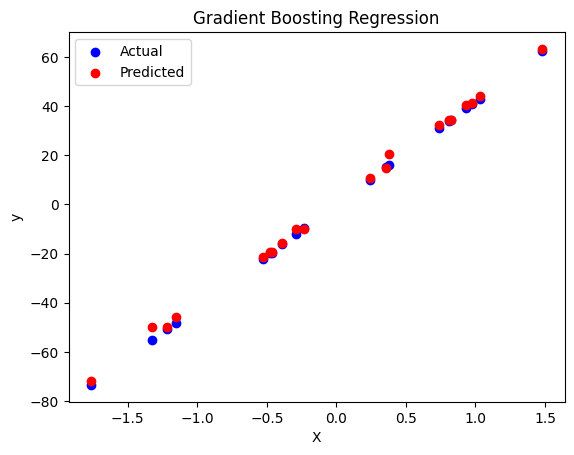

In [15]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Генерация случайных данных для задачи регрессии
X, y = make_regression(n_samples=100, n_features=1, noise=0.2, random_state=42)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели градиентного бустинга
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка качества модели с помощью среднеквадратичной ошибки
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Визуализация результатов
plt.scatter(X_test, y_test, color='b', label='Actual')
plt.scatter(X_test, y_pred, color='r', label='Predicted')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gradient Boosting Regression')
plt.show()


## Дерево для классификации

Реализация по: https://www.youtube.com/watch?v=StWY5QWMXCw и 
https://maelfabien.github.io/machinelearning/GradientBoostC/#

"Log odds" (логарифм шансов) относится к математической функции, которая измеряет отношение вероятности успеха к вероятности неудачи и берет ее логарифм. Она используется для преобразования вероятностей в непрерывный диапазон и представления их в линейном масштабе.

Формально, лог odds отношения шансов вычисляется следующим образом:

$
\text{log odds} = \log\left(\frac{p}{1-p}\right)
$

где:
- log odds - логарифм шансов (log odds),
- p - вероятность успеха (или принадлежности к классу 1),
- 1-p - вероятность неудачи (или принадлежности к классу 0).

Лог odds представляет собой численное значение, которое может быть положительным или отрицательным, в зависимости от отношения вероятностей успеха и неудачи. Эта мера широко используется в статистике и машинном обучении.

Входные данные: Data $\{(x_i, y_i)\}_{i=1}^n$

Дифференцируемая функция потерь $L(y_i, F(x_i))$

Шаг 1: Инициализировать модель константным значением: $F_0(x)=\underset{\gamma}{\operatorname{argmin}} \sum_{i=1}^n L(y_i, \gamma)$

Шаг 2: for $m=1$ to $M$ : (для каждого из M деревьев в ансамбле)

(A) Вычисление остатков (residuals) $r_{i m}=-\left[\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)}\right]_{F(x)=F_{m-1}(x)}$ for $i=1, \ldots, n$ (i - i-й обучающий пример)

(B) Обучить дерево на объектах $r_{\text {im }}$ и получить $J$ листьев $R_{j m}$, for $j=1 \ldots J_m$

(C) Для каждого листа $j=1 \ldots J_m$ вычислить предсказание $\gamma_{j m}=\underset{\gamma}{\operatorname{argmin}} \sum_{x_i \in R_{i j}} L\left(y_i, F_{m-1}\left(x_i\right)+\gamma\right)$

(D) Добавить текущее предсказание к уже полученному значению на предыдущих итерациях $F_m(x)=F_{m-1}(x)+\nu \sum_{j=1}^{J_m} \gamma_{j m} I\left(x \in R_{j m}\right)$ , где $\nu$ - скорость обучения.

Шаг 3: Получить итоговые предсказания $F_M(x)$

In [ ]:
class GBClassificationRegressionTree(BasicTree):
    
    def __init__(self, max_depth=None, criterion="entropy"):
        """
        Инициализирует объект GBClassificationRegressionTree.
        Реализация по: https://www.youtube.com/watch?v=StWY5QWMXCw и 
        https://maelfabien.github.io/machinelearning/GradientBoostC/#

        Аргументы:
        - max_depth: максимальная глубина дерева (опционально). 
        - criterion: выбор способа разбиений деревьев. Выбирается из списка: 
        ["mse", "entropy", "gini"]
        Если значение None, то дерево будет строиться без ограничения глубины.
        """
        self.max_depth = max_depth
        self.criterion = criterion
        self.tree = None


    def _create_leaf_node(self, y, y_pred):
        """
        Создает листовой узел дерева регрессии.

        Аргументы:
        - y: вектор numpy с вещественными значениями целевой переменной.

        Возвращает:
        - node: словарь, представляющий листовой узел среднего значения целевой переменной.
        """
        return {'value': np.sum(y) / np.sum(y_pred * (1 - y_pred))}


In [ ]:
class GradientBoostingClassifier:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=None):
        """
        Инициализация класса GradientBoostingClassifier
        
        Параметры:
        - n_estimators: int, количество базовых моделей (деревьев решений)
        - learning_rate: float, скорость обучения (шаг градиентного спуска)
        - max_depth: int, максимальная глубина деревьев решений
        """
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.estimators = []

    def fit(self, X, y):
        """
        Обучение модели GradientBoostingClassifier
        
        Параметры:
        - X: numpy.array, массив признаков
        - y: numpy.array, массив целевых значений
        """
        # Инициализация начальных предсказаний средним значением y
        y_pred = np.full_like(y, self._sigmoid(np.log(np.count_nonzero(y == 1) / np.count_nonzero(y == 0))), 
                              dtype=np.float64)

#         y_pred = np.full_like(y, 0, dtype=np.float64)

        for _ in range(self.n_estimators):
            # Вычисление остатков (residuals) как разницы между y и предсказаниями
            residuals = y - y_pred

            # Создание и обучение базовой модели (дерева решений) на остатках
            estimator = GBClassificationRegressionTree(max_depth=self.max_depth)
            estimator.fit(X, residuals, y_pred)

            # Добавление базовой модели в список
            self.estimators.append(estimator)

            # Обновление предсказаний путем добавления произведения скорости обучения и предсказаний базовой модели
            y_pred += self.learning_rate * estimator.predict(X)

    def predict(self, X):
        """
        Предсказание классов для новых данных
        
        Параметры:
        - X: numpy.array, массив признаков для предсказания
        
        Возвращает:
        - predictions: numpy.array, массив предсказанных классов (0 или 1)
        """
        # Инициализация предсказаний с константным значением 0.5
        y_pred = np.full(len(X), 0.5)

        for estimator in self.estimators:
            # Обновление предсказаний путем добавления произведения скорости обучения и предсказаний базовой модели
            y_pred += self.learning_rate * estimator.predict(X)

        # Округление предсказаний и преобразование в целочисленный тип
        predictions = (y_pred >= 0.5).astype(int)

        return predictions

    def _sigmoid(self, x):
        """
        Функция сигмоиды
        
        Параметры:
        - x: numpy.array, массив значений
        
        Возвращает:
        - numpy.array, массив значений, преобразованных с помощью сигмоиды
        """
        return 1 / (1 + np.exp(-x))


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Генерация синтетических данных
X, y = make_classification(n_classes=2, n_samples=1000, n_features=10, random_state=42)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

# Прогнозирование классов для тестовой выборки
y_pred = model.predict(X_test)

# Вычисление и вывод точности модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

## XGBoost

XGBoost (eXtreme Gradient Boosting) - это библиотека градиентного бустинга, предназначенная для решения задач классификации и регрессии. Она основана на идее градиентного бустинга, который строит ансамбль слабых моделей (обычно деревьев решений) и объединяет их для получения более сильной и устойчивой модели.

Описание алгоритма XGBoost:

1. Инициализация модели:
   - Инициализируется модель с нулевыми предсказаниями (например, средним значением целевой переменной для задачи регрессии или логарифмом отношения шансов для задачи классификации).

2. Построение базовых моделей (деревьев решений):
   - Каждое дерево строится поэтапно. На каждом этапе добавляется новое дерево с учетом остатков, оставшихся после предыдущих деревьев.
   - Для построения дерева используется критерий информативности, такой как критерий Джини или энтропийный критерий, для определения наилучшего разбиения на каждом узле дерева.
   - Деревья строятся с ограничением на их глубину или другими параметрами, чтобы избежать переобучения.

3. Вычисление градиентов и обновление предсказаний:
   - После построения каждого дерева вычисляются градиенты ошибки между предсказаниями модели и истинными значениями целевой переменной.
   - Предсказания модели обновляются путем добавления взвешенной версии предсказаний нового дерева. Веса определяются скоростью обучения (learning rate), которая контролирует влияние каждого дерева на итоговое предсказание модели.

4. Регуляризация и предотвращение переобучения:
   - Дополнительные механизмы регуляризации в XGBoost помогают предотвратить переобучение и улучшить обобщающую способность модели.
   - XGBoost предлагает несколько методов регуляризации, таких как L1- и L2-регуляризация (также известные как регуляризация Лассо и ридж), которые помогают контролировать сложность модели и предотвращать переобучение. Эти методы добавляют штрафы к функции потерь, которые зависят от весов модели.

6. Функция потерь:
   - XGBoost использует адаптивную функцию потерь, которая сочетает в себе различные функции потерь в зависимости от значения целевой переменной. Например, для задачи классификации с двумя классами может использоваться кросс-энтропия ($L(y, \hat{y}) = -y \log(\hat{y}) - (1-y) \log(1-\hat{y})$), а для задачи регрессии - среднеквадратичная ошибка $(\frac{1}{n}\sum (y - \hat{y})^2)$.
   
7. Ансамблирование деревьев:
   - Поскольку XGBoost строит ансамбль из нескольких деревьев, предсказания каждого дерева складываются, чтобы получить итоговое предсказание модели. Модель объединяет прогнозы всех деревьев с учетом их весов, определенных на основе ошибок и значимости.

8. Прогнозирование:
    - После обучения модели XGBoost можно использовать для прогнозирования на новых данных. Модель принимает входные признаки и возвращает прогнозы для задач классификации или регрессии.

## LightGBM

Описание алгоритма LightGBM:

1. Инициализация модели:
   - Инициализируется модель с нулевыми предсказаниями (например, средним значением целевой переменной для задачи регрессии или логарифмом отношения шансов для задачи классификации).

2. Построение базовых моделей (деревьев решений):
   - LightGBM использует алгоритм градиентного бустинга над решающими деревьями.
   - Деревья строятся поэтапно, аналогично XGBoost. На каждом этапе добавляется новое дерево с учетом остатков, оставшихся после предыдущих деревьев.
   - LightGBM использует оптимизированную версию алгоритма градиентного бустинга, которая основана на методе обучения по гистограммам. Это позволяет существенно ускорить процесс построения деревьев.

3. Вычисление градиентов и обновление предсказаний:
   - После построения каждого дерева вычисляются градиенты ошибки между предсказаниями модели и истинными значениями целевой переменной.
   - Предсказания модели обновляются путем добавления взвешенной версии предсказаний нового дерева, аналогично XGBoost.

4. Регуляризация и предотвращение переобучения:
   - LightGBM также предлагает несколько методов регуляризации для предотвращения переобучения модели.
   - Он поддерживает L1-регуляризацию (регуляризацию Лассо) и L2-регуляризацию (регуляризацию ридж), которые добавляют штрафы к функции потерь, аналогично XGBoost.

6. Функция потерь:
   - LightGBM поддерживает различные функции потерь, в зависимости от типа задачи (классификация или регрессия). Для задачи бинарной классификации часто используется логистическая функция потерь, а для задачи регрессии - среднеквадратичная ошибка (MSE), аналогично XGBoost.

7. Ансамблирование деревьев:
   - LightGBM также строит ансамбль из нескольких деревьев, и предсказания каждого дерева складываются для получения итогового предсказания модели.

8. Прогнозирование:
   - После обучения модели LightGBM можно использовать для прогнозирования на новых данных, аналогично XGBoost. Модель принимает входные признаки и возвращает прогнозы для задач классификации или регрессии.

## Catboost

Описание алгоритма CatBoost:

1. Инициализация модели:
   - Инициализируется модель CatBoost с нулевыми предсказаниями (например, средним значением целевой переменной для задачи регрессии или логарифмом отношения шансов для задачи классификации).

2. Построение базовых моделей (деревьев решений):
   - CatBoost использует алгоритм градиентного бустинга над решающими деревьями.
   - Деревья строятся поэтапно, аналогично XGBoost и LightGBM. На каждом этапе добавляется новое дерево с учетом остатков, оставшихся после предыдущих деревьев.
   - CatBoost применяет особый подход к кодированию категориальных признаков, называемый симметричным бинарным кодированием, который учитывает взаимодействия между категориями и признаками.

3. Вычисление градиентов и обновление предсказаний:
   - После построения каждого дерева вычисляются градиенты ошибки между предсказаниями модели и истинными значениями целевой переменной.
   - Предсказания модели обновляются путем добавления взвешенной версии предсказаний нового дерева, аналогично XGBoost и LightGBM.

4. Регуляризация и предотвращение переобучения:
   - CatBoost также предлагает несколько методов регуляризации для предотвращения переобучения модели.
   - Он поддерживает L1-регуляризацию (регуляризацию Лассо) и L2-регуляризацию (регуляризацию ридж), которые добавляют штрафы к функции потерь, аналогично XGBoost и LightGBM.

6. Функция потерь:
   - CatBoost поддерживает различные функции потерь, в зависимости от типа задачи (классификация или регрессия). Для задачи бинарной классификации часто используется логистическая функция потерь, а для задачи регрессии - среднеквадратичная ошибка (MSE), аналогично XGBoost и LightGBM.

7. Ансамблирование деревьев:
   - CatBoost также строит ансамбль из нескольких деревьев, и предсказания каждого дерева складываются, чтобы получить итоговое предсказание модели.
   - CatBoost также учитывает веса деревьев на основе их ошибок и значимости, аналогично XGBoost и LightGBM.

8. Прогнозирование:
   - После обучения модели CatBoost можно использовать для прогнозирования на новых данных. Модель принимает входные признаки и возвращает прогнозы для задач классификации или регрессии.